# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

import sklearn
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins

penguins = load_penguins()

In [2]:
penguins = pd.get_dummies(penguins, drop_first=True)
penguins = penguins.dropna()
penguins = penguins.astype(int)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39,18,181,3750,2007,0,0,0,1,1
1,39,17,186,3800,2007,0,0,0,1,0
2,40,18,195,3250,2007,0,0,0,1,0
4,36,19,193,3450,2007,0,0,0,1,0
5,39,20,190,3650,2007,0,0,0,1,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [3]:
# Code Here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from plotnine import *

/usr/local/lib/python3.12/dist-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


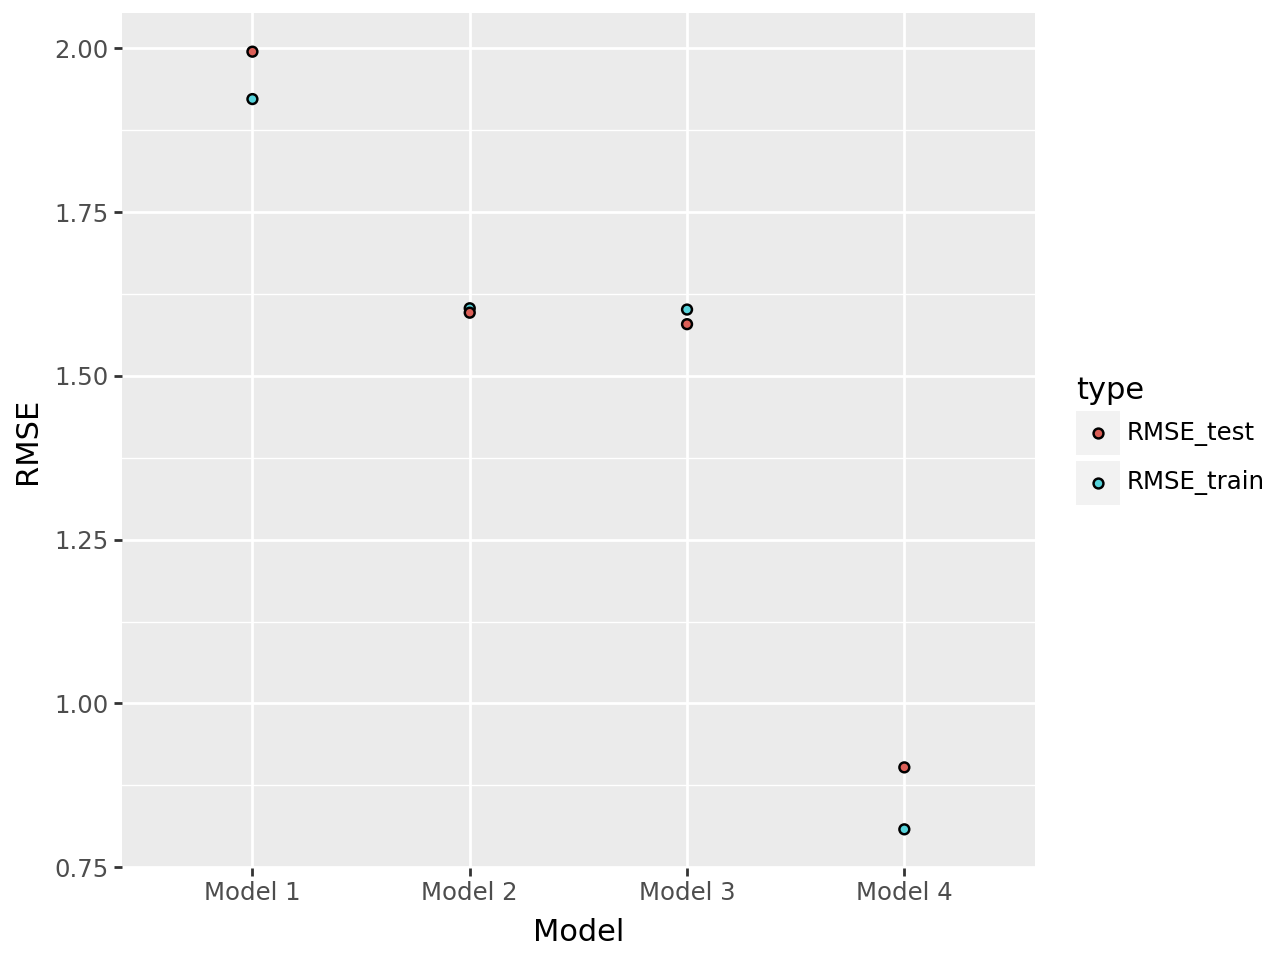

In [17]:
y = penguins["bill_depth_mm"]
x = penguins.drop(columns=["bill_depth_mm"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

models = {
    "Model 1": ["bill_length_mm"],
    "Model 2": ["bill_length_mm", "flipper_length_mm"],
    "Model 3": ["bill_length_mm", "flipper_length_mm", "body_mass_g"],
    "Model 4": ["bill_length_mm", "flipper_length_mm", "body_mass_g",
                "species_Chinstrap", "species_Gentoo", "island_Dream",
                "island_Torgersen", "sex_male"]
}

rows=[]
for name, xcols in models.items():
    model = LinearRegression().fit(x_train[xcols], y_train)
    training_y_pred = model.predict(x_train[xcols])
    mse_train=mean_squared_error(y_train, training_y_pred)
    rows.append([name, mse_train, np.sqrt(mse_train)])
train_error=pd.DataFrame(rows, columns=["Model", "MSE", "RMSE"])

rows=[]
for name, xcols in models.items():
    model = LinearRegression().fit(x_train[xcols], y_train)
    test_y_pred = model.predict(x_test[xcols])
    mse_test=mean_squared_error(y_test, test_y_pred) # Corrected to use y_test and test_y_pred
    rows.append([name, mse_test, np.sqrt(mse_test)])
test_error=pd.DataFrame(rows, columns=["Model", "MSE", "RMSE"])

df_error=train_error.merge(test_error, on="Model", suffixes=('_train', '_test')) # Added suffixes for clarity
df_error_long=pd.melt(df_error, id_vars=["Model"], value_vars=["RMSE_train", "RMSE_test"], value_name="RMSE", var_name="type")

ggplot(df_error_long, aes(x="Model", y="RMSE", fill="type")) + \
geom_line() + \
geom_point()